In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
df = pd.read_csv(r"C:\Users\user\Downloads\Supermart Grocery Sales - Retail Analytics Dataset.csv")
df.head(10)

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu
5,OD6,Adavan,Food Grains,Organic Staples,Dharmapuri,06-09-2015,West,2305,0.26,322.70,Tamil Nadu
6,OD7,Jonas,Fruits & Veggies,Fresh Vegetables,Trichy,06-09-2015,West,826,0.33,346.92,Tamil Nadu
7,OD8,Hafiz,Fruits & Veggies,Fresh Fruits,Ramanadhapuram,06-09-2015,West,1847,0.32,147.76,Tamil Nadu
8,OD9,Hafiz,Bakery,Biscuits,Tirunelveli,06-09-2015,West,791,0.23,181.93,Tamil Nadu
9,OD10,Krithika,Bakery,Cakes,Chennai,06-09-2015,West,1795,0.27,484.65,Tamil Nadu


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


In [7]:
df.isnull().sum()

Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64

In [9]:
df.drop_duplicates(inplace=True)

In [11]:
df.dropna(inplace=True)

In [33]:
#convert date columns into date time format
df['Order Date'] = pd.to_datetime(df['Order Date'], errors = 'coerce')

In [35]:
df['Order Day'] = df['Order Date'].dt.day

In [37]:
df['Order Month'] = df['Order Date'].dt.month

In [39]:
df['Order year'] = df['Order Date'].dt.year

In [ ]:
# sales Trends over time

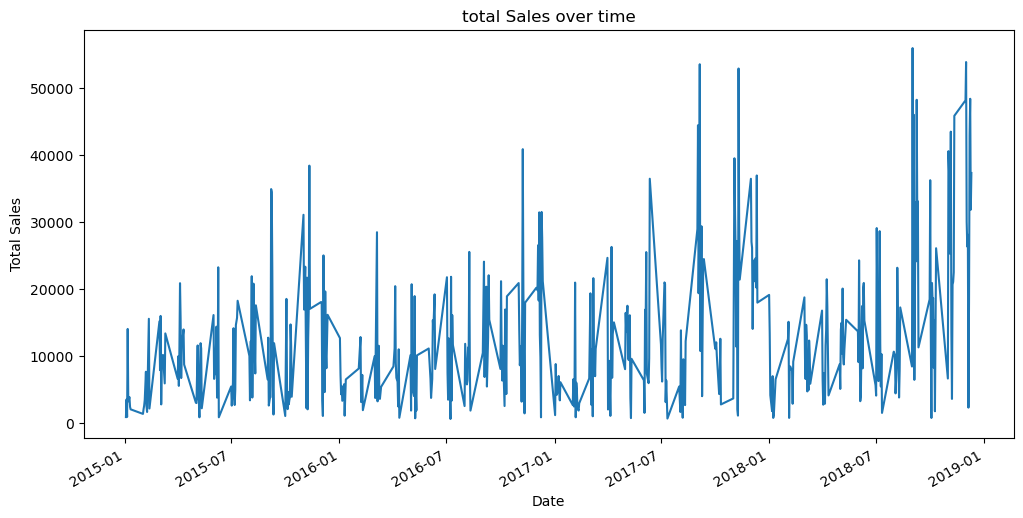

In [17]:
plt.figure(figsize=(12,6))
df.groupby('Order Date')['Sales'].sum().plot()
plt.title('total Sales over time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

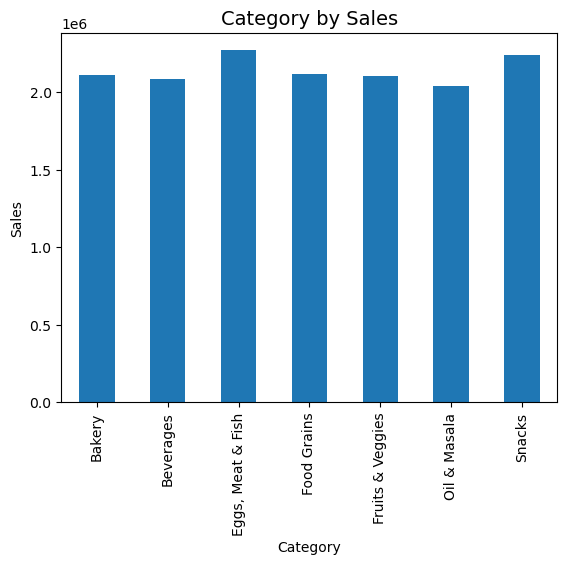

In [19]:
Sales_category=df.groupby("Category")["Sales"].sum()
Sales_category.plot(kind='bar')
plt.title('Category by Sales', fontsize = 14)
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()

In [31]:
#Sum up sales by month
monthly_sales = df.groupby('Order Month')['Sales'].sum().reset_index()

In [41]:
# Sort the data by month
monthly_sales_sorted = monthly_sales.sort_values(by='Order Month')

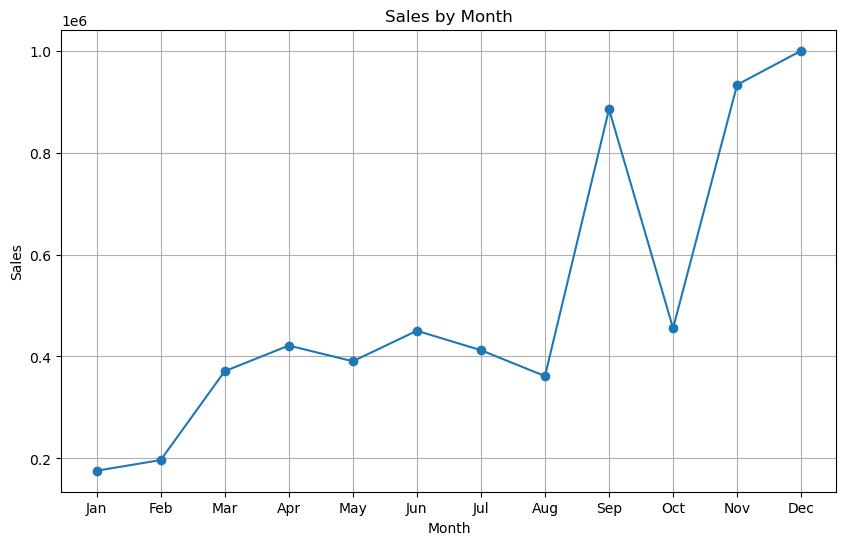

In [45]:
#Create the line chart
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales_sorted['Order Month'],
monthly_sales_sorted['Sales'], marker='o')
plt.title('Sales by Month')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(monthly_sales_sorted['Order Month'], ['Jan', 'Feb', 'Mar',
'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()


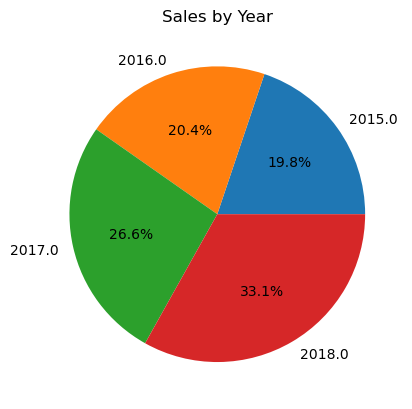

In [47]:
Yearly_Sales=df.groupby("Order year")["Sales"].sum()
# we create a pie chart with the sales by year
plt.pie(Yearly_Sales, labels=Yearly_Sales.index,
autopct='%1.1f%%')
plt.title('Sales by Year')
plt.show()

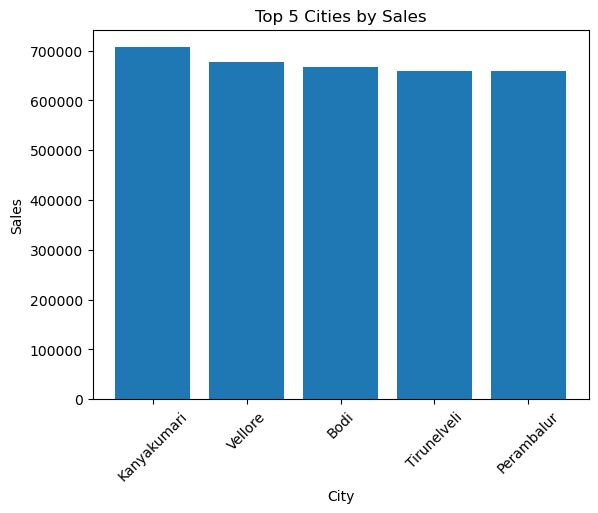

In [49]:
city_sales = df[['City', 'Sales']]
# Step 2: Calculate total sales per city
total_sales = city_sales.groupby('City').sum()
# Step 3: Sort the cities by sales
sorted_cities = total_sales.sort_values(by='Sales',
ascending=False)
# Step 4: Select the top 5 cities
top_cities = sorted_cities.head(5)
# Step 5: Plot the bar chart
plt.bar(top_cities.index, top_cities['Sales'])
plt.xlabel('City')
plt.ylabel('Sales')
plt.title('Top 5 Cities by Sales')
plt.xticks(rotation=45)
plt.show()